# AEC Cell model V1.0 (14/07/2022)

Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from func_21_06_class_sakas import *
from Thermal_assess import *

## Documentation for this model:
    

Intial conditions to be set: <br>
- T: Setting temperature [K]
- P_s: setting system operating pressure [bar]
- w: weight ratio of KOH in electrolyte [0-1]
-  delta_l: reaction distance [cm] <br>

Input: <br>
x: a list or a single current densities [mA/cm^2] 

output:<br>
df: a dataframe containing polarisation curve with different conditions<br>
V: Cell voltage (if a single current density is given)
      
Experiments:<br>
- Kibria experiments performed with: 30 %wt KOH 
- Miles experiments performed with:50 wt% KOH <br>

List of possible outputs:
- model.kibria(x): Kibria set of i0 and alpha (experiments at 30% wt KOH ) without bubble effects
- model.kibria_bub_act_ohm(x): Kibria conditions with high overvoltage region including bubble effects
- model.Miles(x):Miles conditions with high overvoltage region without bubbles
- model.Miles_bub_act(x): Miles conditions with high overvoltage  work regfion including only activation bubble effects
- model.Miles_bub_act_ohm(x): Miles conditions with high overvoltage work region including both bubble effects
- model.kibria_mix_bub_act_ohm(x): Kibria with both sets of i0 and alphas including bubble effects
- model.kibria_mix_bub_act(x): Kibria with both sets of i0 and alphas including only activation bubble effects
- model.kibria_mono(x) <br>
 
       
As starting point the normal kibria condition(model.kibria(x)) without the bubble effects should be a good approximation

Updates documentation: <br>
- update in 09-06: wt correction in kibria conditions high voltage 
- update in 21-06: Activation energy correction
- latest update:14-07-2022


## Setting conditions

In [2]:
T=353 #[k]
P_s=1 #[bar] system pressure bar
w=0.3 #wt ratio (0-1)
delta_l=0.005 #[cm]
Th=Thermal_properties(T)
F=96500 #[C/mol]
v_tn=((Th.delta_h())/(2*F))

## Load model with setting conditions

In [3]:
model= AEC_model(T,P_s,w,delta_l)
model.wt_to_cOH()

### Single voltage

In [7]:
x_single=200 #single current density
V=model.kibria_mono(x_single)
print(f"Voltage for J={x_single}[mA/cm^2] is {round(V,2)} Volts")

Voltage for J=200[mA/cm^2] is 1.6 Volts


### Polarisation curve 





In [16]:
x=np.linspace(2,1000,100)
df=model.kibria(x)
df.head()

2.000000     0.928559
12.080808    1.183490
22.161616    1.270375
32.242424    1.324571
42.323232    1.364261
Name: Tafel, dtype: float64

Text(0.5, 1.0, 'w=30.0%KOH, P=1 [bar], delta=0.005 [cm], COH=6.7 $[mol/dm^3]$')

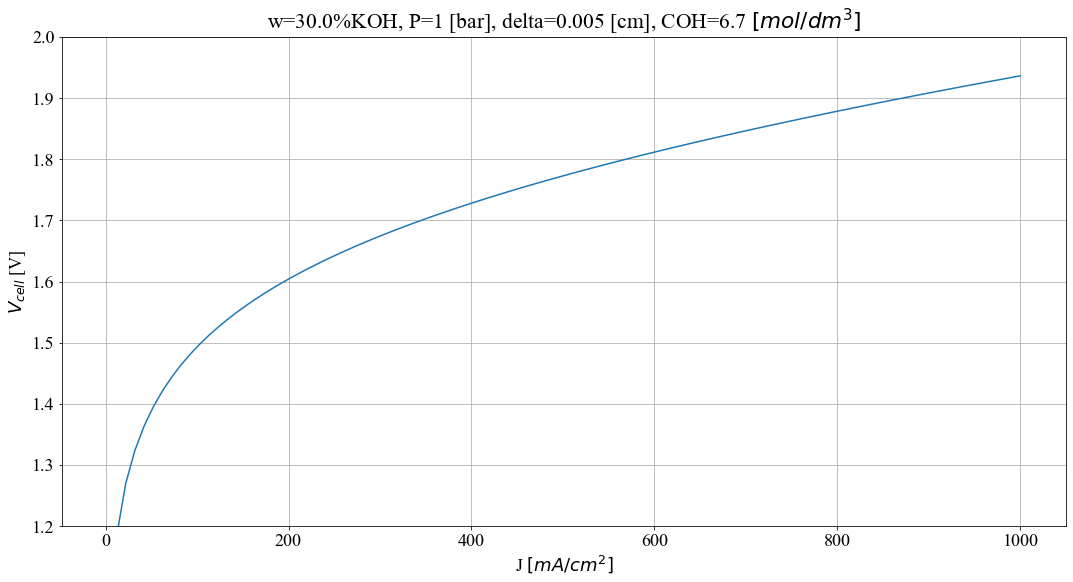

In [23]:
plt.rcParams.update({'font.size': 18, 'font.family': "Times New Roman"})

plt.figure(figsize=(18,9))
df.plot(legend=False)
#plt.plot(df.index,df)

plt.ylim(1.2,2)

plt.grid()
plt.xlabel("J $[mA/cm^2]$")
plt.ylabel("$V_{cell}$ [V]")
co="$[mol/dm^3]$"
plt.title(f"w={w*100}%KOH, P={P_s} [bar], delta={round(delta_l,3)} [cm], COH={round(model.COH_conc,1)} "+co)
